In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [2]:
filepath = "/Users/sdutta/OneDrive - Johns Hopkins/Documents/esm/ncar_esm2/"

In [3]:
ds = xr.open_dataset(filepath + "climatology_Omon_NCAR_CESM2_esm-piControl_r1i1p1f1_gn_040101-050012.nc",engine="netcdf4")

In [4]:
ds

<xarray.Dataset> Size: 79MB
Dimensions:    (month: 12, nlat: 384, nlon: 320)
Coordinates:
    lat        (nlat, nlon) float64 983kB ...
    lon        (nlat, nlon) float64 983kB ...
  * nlat       (nlat) int32 2kB 1 2 3 4 5 6 7 8 ... 378 379 380 381 382 383 384
  * nlon       (nlon) int32 1kB 1 2 3 4 5 6 7 8 ... 314 315 316 317 318 319 320
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/13)
    dfeos      (month, nlat, nlon) float32 6MB ...
    mlotst     (month, nlat, nlon) float32 6MB ...
    nh4os      (month, nlat, nlon) float32 6MB ...
    no3os      (month, nlat, nlon) float32 6MB ...
    po4os      (month, nlat, nlon) float32 6MB ...
    rsntds     (month, nlat, nlon) float32 6MB ...
    ...         ...
    sos        (month, nlat, nlon) float32 6MB ...
    tos        (month, nlat, nlon) float32 6MB ...
    wo         (month, nlat, nlon) float32 6MB ...
    phydiatos  (month, nlat, nlon) float32 6MB ...
    phydiazos  (month, nlat, nlon) float32 6MB ...
    phypicoos  (month, nlat, nlon) float32 6MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  29200.0
    case_id:                973
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/f0f4c45d-bf5f-45de-baee-31e50497e796
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 esm-piControl experiment with CAM6, i...
    variant_label:          r1i1p1f1

In [5]:
ds

<xarray.Dataset> Size: 79MB
Dimensions:    (month: 12, nlat: 384, nlon: 320)
Coordinates:
    lat        (nlat, nlon) float64 983kB ...
    lon        (nlat, nlon) float64 983kB ...
  * nlat       (nlat) int32 2kB 1 2 3 4 5 6 7 8 ... 378 379 380 381 382 383 384
  * nlon       (nlon) int32 1kB 1 2 3 4 5 6 7 8 ... 314 315 316 317 318 319 320
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/13)
    dfeos      (month, nlat, nlon) float32 6MB ...
    mlotst     (month, nlat, nlon) float32 6MB ...
    nh4os      (month, nlat, nlon) float32 6MB ...
    no3os      (month, nlat, nlon) float32 6MB ...
    po4os      (month, nlat, nlon) float32 6MB ...
    rsntds     (month, nlat, nlon) float32 6MB ...
    ...         ...
    sos        (month, nlat, nlon) float32 6MB ...
    tos        (month, nlat, nlon) float32 6MB ...
    wo         (month, nlat, nlon) float32 6MB ...
    phydiatos  (month, nlat, nlon) float32 6MB ...
    phydiazos  (month, nlat, nlon) float32 6MB ...
    phypicoos  (month, nlat, nlon) float32 6MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  29200.0
    case_id:                973
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/f0f4c45d-bf5f-45de-baee-31e50497e796
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 esm-piControl experiment with CAM6, i...
    variant_label:          r1i1p1f1

In [6]:
# Create target grid
target_grid = {
    'lon': np.linspace(-179.5, 180.5, 361),
    'lat': np.linspace(-89.5, 89.5, 180)
}

# Build regridder (assumes ds.lon and ds.lat are 2D)
regridder = xe.Regridder(ds, target_grid, method='bilinear')

# Apply regridding to all variables
ds_regrid = regridder(ds)

In [8]:
ds_regrid

<xarray.Dataset> Size: 41MB
Dimensions:    (month: 12, lat: 180, lon: 361)
Coordinates:
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5 180.5
Data variables: (12/13)
    dfeos      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 1.276e-06 1.276e-06
    mlotst     (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 58.88 58.88 58.88
    nh4os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 6.9e-06 6.897e-06
    no3os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.004583 0.004584
    po4os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.001134 0.001134
    rsntds     (month, lat, lon) float32 3MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...         ...
    sos        (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 31.98 31.98 31.98
    tos        (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... -1.787 -1.787
    wo         (month, lat, lon) float32 3MB 0.0 0.0 ... -1.305e-07 -1.27e-07
    phydiatos  (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 1.996e-05 1.996e-05
    phydiazos  (month, lat, lon) float32 3MB 0.0 0.0 ... -6.176e-08 -6.176e-08
    phypicoos  (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 9.983e-06 9.983e-06
Attributes:
    regrid_method:  bilinear

[]

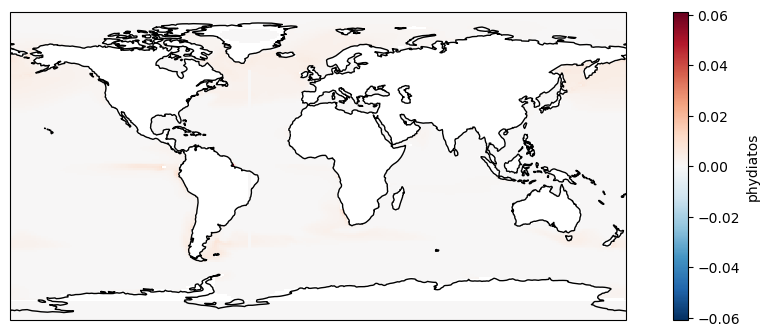

In [11]:
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_regrid['phydiatos'].mean(dim='month').plot.pcolormesh(ax=ax, x="lon", y="lat")
ax.coastlines()
plt.plot()

In [12]:
# Transfer attributes
ds_regrid.attrs.update(ds.attrs)

In [13]:
ds_regrid

<xarray.Dataset> Size: 41MB
Dimensions:    (month: 12, lat: 180, lon: 361)
Coordinates:
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5 180.5
Data variables: (12/13)
    dfeos      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 1.276e-06 1.276e-06
    mlotst     (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 58.88 58.88 58.88
    nh4os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 6.9e-06 6.897e-06
    no3os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.004583 0.004584
    po4os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.001134 0.001134
    rsntds     (month, lat, lon) float32 3MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...         ...
    sos        (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 31.98 31.98 31.98
    tos        (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... -1.787 -1.787
    wo         (month, lat, lon) float32 3MB 0.0 0.0 ... -1.305e-07 -1.27e-07
    phydiatos  (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 1.996e-05 1.996e-05
    phydiazos  (month, lat, lon) float32 3MB 0.0 0.0 ... -6.176e-08 -6.176e-08
    phypicoos  (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 9.983e-06 9.983e-06
Attributes: (12/46)
    regrid_method:          bilinear
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  29200.0
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/f0f4c45d-bf5f-45de-baee-31e50497e796
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 esm-piControl experiment with CAM6, i...
    variant_label:          r1i1p1f1

In [14]:
# convert from moles m-3 to mg m-3 : 1 moles/m3 = 1.2e4 mg/m3
ds_regrid['phydiatos'] = 1.2e4 * ds_regrid['phydiatos']
ds_regrid['phypicoos'] = 1.2e4 * ds_regrid['phypicoos']

In [15]:
ds_regrid['phycos'] = ds_regrid['phydiatos'] + ds_regrid['phypicoos']
ds_regrid['phycos'].attrs['description'] = 'carbon from the total phytoplankton obtained by adding phydiatos and phypicoos'
ds_regrid['phycos'].attrs['frequency'] = 'mon'
ds_regrid['phycos'].attrs['standard_name'] = 'Total_phytoplankton_expressed_as_carbon_in_sea_water'
ds_regrid['phycos'].attrs['units'] = 'mg m-3'

In [16]:
ds_regrid['phydiatos'].attrs['units'] = 'mg m-3'
ds_regrid['phypicoos'].attrs['units'] = 'mg m-3'

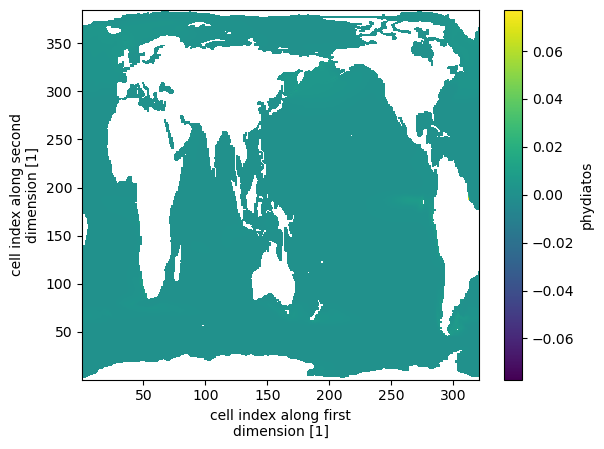

In [17]:
ds.mean(dim='month').phydiatos.plot(cmap='viridis')

In [18]:
# Variable Fill : lower of the min value and 10% of max value at each lat/lon
# List of variables to process

variables = ['phycos', 'phydiatos', 'phypicoos']

for var in variables:
    # Create a mask for values that are less than 1e-8 or NaN
    mask = (ds_regrid[var] < 1e-8) | (ds_regrid[var].isnull())
    
    # Compute min and max for values that are greater than 1e-8 (ignoring NaNs)
    min_val = ds_regrid[var].where(ds_regrid[var] > 1e-8).min(dim='month', skipna=True)
    max_val = ds_regrid[var].where(ds_regrid[var] > 1e-8).max(dim='month', skipna=True)

    # Compute 10% of max
    max10 = 0.1 * max_val

    # Take the minimum of (min_val, 10% of max_val)
    fill_val = xr.where(min_val < max10, min_val, max10)

    # # Expand back to (month, lat, lon)
    # fill_val_broadcast = fill_val.expand_dims(month=ds_regrid.month).transpose('month', 'lat', 'lon')

    # Replace values less than 1e-8 or NaN with fill_val
    ds_regrid[var] = xr.where(mask, fill_val, ds_regrid[var])

In [19]:
ds_regrid['logphyc'] = np.log10(ds_regrid['phycos'])
ds_regrid['logdiat'] = np.log10(ds_regrid['phydiatos'])
ds_regrid['logpico'] = np.log10(ds_regrid['phypicoos'])

In [20]:
ds_regrid = ds_regrid.drop_vars('phydiazos')
ds_regrid

<xarray.Dataset> Size: 50MB
Dimensions:    (month: 12, lat: 180, lon: 361)
Coordinates:
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5 180.5
Data variables: (12/16)
    dfeos      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 1.276e-06 1.276e-06
    mlotst     (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 58.88 58.88 58.88
    nh4os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 6.9e-06 6.897e-06
    no3os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.004583 0.004584
    po4os      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.001134 0.001134
    rsntds     (month, lat, lon) float32 3MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...         ...
    phydiatos  (month, lat, lon) float32 3MB nan nan nan ... 0.2395 0.2395
    phypicoos  (month, lat, lon) float32 3MB nan nan nan ... 0.1198 0.1198
    phycos     (month, lat, lon) float32 3MB nan nan nan ... 0.3593 0.3593
    logphyc    (month, lat, lon) float32 3MB nan nan nan ... -0.4446 -0.4446
    logdiat    (month, lat, lon) float32 3MB nan nan nan ... -0.6207 -0.6207
    logpico    (month, lat, lon) float32 3MB nan nan nan ... -0.9216 -0.9216
Attributes: (12/46)
    regrid_method:          bilinear
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  29200.0
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/f0f4c45d-bf5f-45de-baee-31e50497e796
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 esm-piControl experiment with CAM6, i...
    variant_label:          r1i1p1f1

In [21]:
list(ds_regrid.keys())

['dfeos',
 'mlotst',
 'nh4os',
 'no3os',
 'po4os',
 'rsntds',
 'sios',
 'sos',
 'tos',
 'wo',
 'phydiatos',
 'phypicoos',
 'phycos',
 'logphyc',
 'logdiat',
 'logpico']

In [22]:
# Create a rename dictionary
rename_dict = {
    'dfeos': 'dfe',  
    'mlotst': 'mld',
    'nh4os': 'nh4',
    'no3os': 'no3',
    'po4os': 'po4',
    'rsntds': 'rsn',
    'sios': 'sil',
    'sos': 'sal',
    'tos': 'sst',
    'wo': 'w50',
    'phydiatos': 'diat',
    'phypicoos': 'pico',
    'phycos': 'phyc',
    'logphyc': 'logphyc',  
    'logdiat': 'logdiat',   # keep the same name
    'logpico': 'logpico'    # keep the same name
}
# Rename the variables
ds_regrid = ds_regrid.rename(rename_dict)

In [23]:
ds_regrid

<xarray.Dataset> Size: 50MB
Dimensions:  (month: 12, lat: 180, lon: 361)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 178.5 179.5 180.5
Data variables: (12/16)
    dfe      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 1.276e-06 1.276e-06
    mld      (month, lat, lon) float32 3MB 0.0 0.0 0.0 0.0 ... 58.88 58.88 58.88
    nh4      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 6.9e-06 6.897e-06
    no3      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.004583 0.004584
    po4      (month, lat, lon) float32 3MB 0.0 0.0 0.0 ... 0.001134 0.001134
    rsn      (month, lat, lon) float32 3MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    diat     (month, lat, lon) float32 3MB nan nan nan ... 0.2395 0.2395 0.2395
    pico     (month, lat, lon) float32 3MB nan nan nan ... 0.1198 0.1198 0.1198
    phyc     (month, lat, lon) float32 3MB nan nan nan ... 0.3593 0.3593 0.3593
    logphyc  (month, lat, lon) float32 3MB nan nan nan ... -0.4446 -0.4446
    logdiat  (month, lat, lon) float32 3MB nan nan nan ... -0.6207 -0.6207
    logpico  (month, lat, lon) float32 3MB nan nan nan ... -0.9216 -0.9216
Attributes: (12/46)
    regrid_method:          bilinear
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  29200.0
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/f0f4c45d-bf5f-45de-baee-31e50497e796
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 esm-piControl experiment with CAM6, i...
    variant_label:          r1i1p1f1

In [24]:
ds_regrid.to_netcdf(filepath + "climatology_Omon_NCAR_CESM2_esm-piControl_r1i1p1f1_gn_040101-050012_regridded_varfill.nc")